<a href="https://colab.research.google.com/github/mariach-code/PROYECTODS_PARTEIII/blob/main/PROYECTODS_PARTEIII_CHUNZA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCCION**

La industria del cine es un negocio multimillonario donde el éxito de una película depende de numerosos factores. Comprender qué elementos contribuyen a la popularidad y al éxito comercial de una película es un objetivo clave para estudios, distribuidores y cineastas. Este proyecto se centra en desarrollar un modelo de predicción que permita estimar la calificación de una película en IMDb en función de variables como género, presupuesto y reparto. Al identificar los factores que influyen en la percepción del público, esta investigación busca contribuir a una mejor comprensión de los mecanismos que subyacen al éxito cinematográfico y proporcionar herramientas útiles para la toma de decisiones en la industria.

**OBJETIVO DEL PROYECTO**

Desarrollar un sistema de recomendación de películas altamente preciso y personalizado para mejorar significativamente la experiencia del usuario en nuestra plataforma de streaming, aumentando así la satisfacción del cliente y la retención.

**CONTEXTO COMERCIAL**

**Sistema de Recomendación de Películas**

En un mercado de streaming cada vez más competitivo, ofrecer una experiencia de usuario personalizada es fundamental para diferenciarse y fidelizar a los clientes. Un sistema de recomendación eficaz permite:

Aumentar el engagement del usuario: Al sugerir películas que se ajusten a sus gustos, se incrementa el tiempo que los usuarios pasan en la plataforma y la probabilidad de que descubran nuevos contenidos.
Reducir la tasa de churn: Al ofrecer recomendaciones relevantes, se reduce la frustración del usuario al buscar contenido y se aumenta su satisfacción con la plataforma.
Incrementar los ingresos: Un mayor engagement y una menor tasa de churn se traducen en un aumento en los ingresos por suscripción.

**HIPOTESIS**

**Correlación:** Calcularemos el coeficiente de correlación entre el número de películas similares vistas y la precisión de las recomendaciones.

**Clasificación:** Crearemos un modelo de clasificación para predecir el género preferido de un usuario basado en su historial de visualización.

**Regresión:** Utilizaremos un modelo de regresión lineal para analizar la relación entre el tiempo de visualización y el número de recomendaciones personalizadas.

**Agrupamiento:** Aplicaremos técnicas de clustering (como K-means o jerárquico) para identificar grupos de usuarios con patrones de visualización similares.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [6]:
from google.colab import files
import pandas as pd

# Subir archivo
uploaded = files.upload()

# Cargar el archivo en un DataFrame de pandas
df = pd.read_excel(next(iter(uploaded)))



Saving Películas (1).xlsx to Películas (1).xlsx


In [7]:
# Valores faltantes en cada columna
missing_values = df.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)


Valores faltantes por columna:
 Unnamed: 0                 0
id                         0
title                      0
release_date              23
genres                    63
original_language          1
vote_average               1
vote_count                 1
popularity                 1
overview                  77
budget                     2
production_companies     520
revenue                    2
runtime                    2
tagline                 2618
dtype: int64


In [8]:
df.head()

,Unnamed: 0,id,title,release_date,genres,original_language,vote_average,vote_count,popularity,overview,budget,production_companies,revenue,runtime,tagline
0,0,385687,Fast X,2023-05-17 00:00:00,Action,English,7.4,1347.0,8363.473,Over many missions and against impossible odds...,340000000.0,Universal Pictures,6.520000e+08,142.0,The end of the road begins.
1,1,603692,John Wick: Chapter 4,2023-03-22 00:00:00,Action,English,7.9,2896.0,4210.313,"With the price on his head ever increasing, Jo...",90000000.0,Thunder Road,4.317692e+08,170.0,"No way back, one way out."
2,2,502356,The Super Mario Bros. Movie,2023-04-05 00:00:00,Animation,English,7.8,4628.0,3394.458,"While working underground to fix a water main,...",100000000.0,Universal Pictures,1.308767e+09,92.0,NaN
3,3,569094,Spider-Man: Across the Spider-Verse,2023-05-31 00:00:00,Action,English,8.8,1160.0,2859.047,"After reuniting with Gwen Stacy, Brooklyn’s fu...",100000000.0,Columbia Pictures,3.135222e+08,140.0,It's how you wear the mask that matters
4,4,536437,Hypnotic,2023-05-11 00:00:00,Mystery,English,6.5,154.0,2654.854,A detective becomes entangled in a mystery inv...,70000000.0,Studio 8,0.000000e+00,94.0,Control is an illusion.


**1. Análisis de la distribución de las variables:**

* Histograma: Permite visualizar la
distribución de una variable numérica.

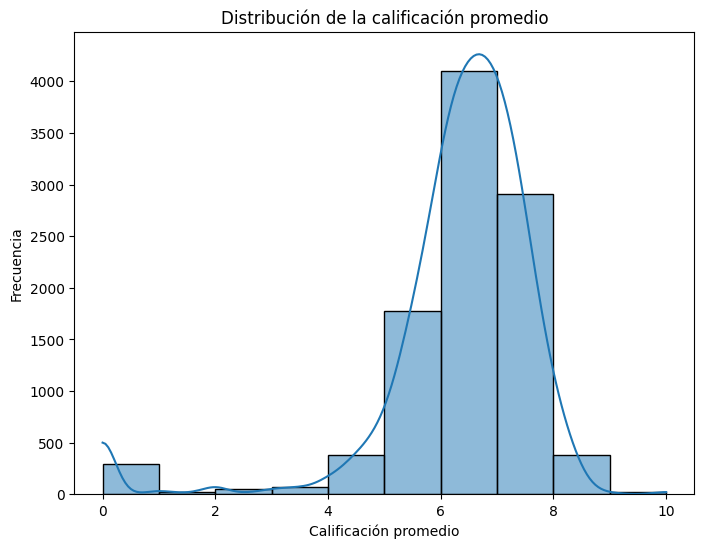

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la variable 'vote_average'
plt.figure(figsize=(8, 6))
sns.histplot(df['vote_average'], bins=10, kde=True)
plt.title('Distribución de la calificación promedio')
plt.xlabel('Calificación promedio')
plt.ylabel('Frecuencia')
plt.show()

* Boxplot: Permite visualizar la
distribución de una variable numérica para diferentes grupos o categorías. Ya has utilizado este tipo de gráfico para analizar la calificación promedio por género. Podrías aplicarlo a otras variables como el presupuesto o la duración

**2. Análisis de la correlación entre variables**

* Matriz de correlación: Muestra la correlación entre todas las variables numéricas del dataset.

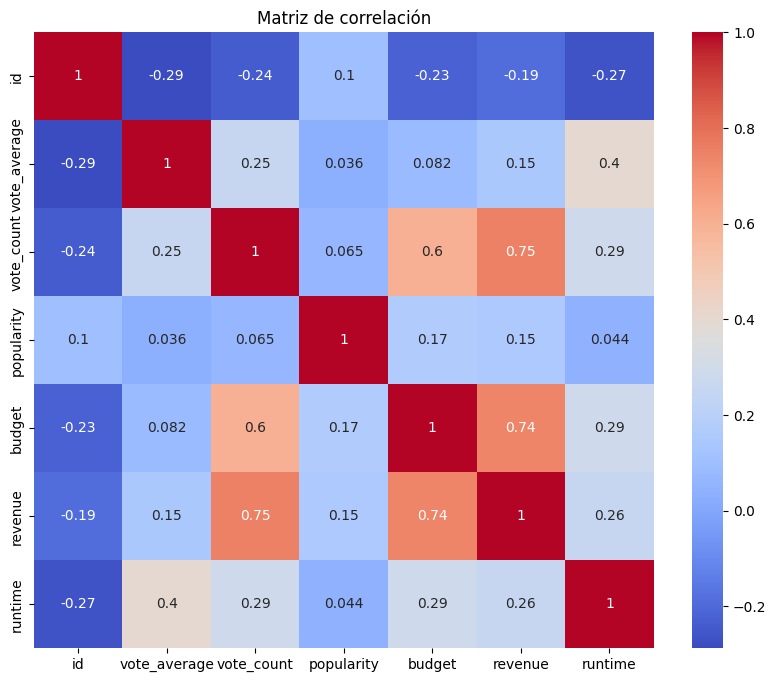

In [10]:
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Matriz de correlación
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

* Gráfico de dispersión: Permite visualizar la relación entre dos variables numéricas. Ya has utilizado este tipo de gráfico para analizar la relación entre la duración y la popularidad. Podrías aplicarlo a otras variables como el presupuesto y la calificación promedio.

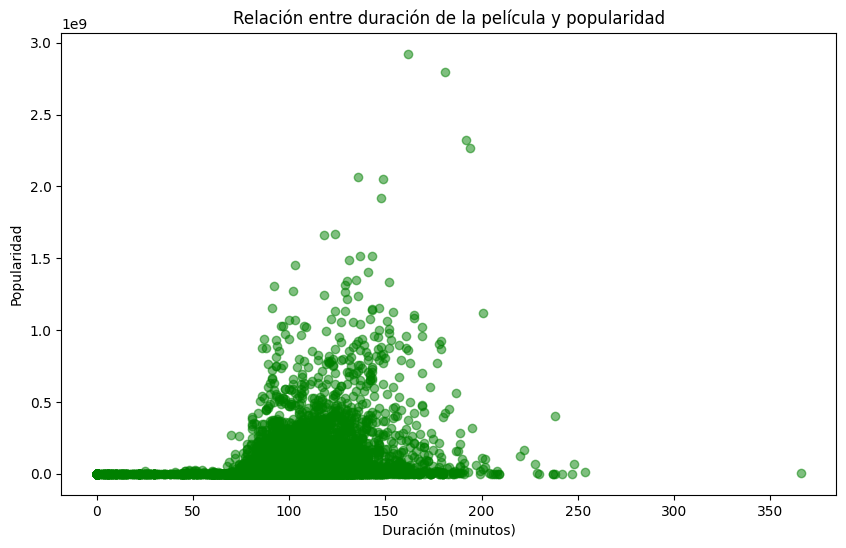

In [11]:
runtime_column = 'runtime'  # Replace 'A' with the actual column name for runtime
revenue_column = 'revenue'  # Replace 'B' with the actual column name for revenue


if runtime_column not in df.columns:
    raise KeyError(f"Column '{runtime_column}' not found in DataFrame.")

if revenue_column not in df.columns:
    raise KeyError(f"Column '{revenue_column}' not found in DataFrame.")

plt.figure(figsize=(10, 6))
plt.scatter(df[runtime_column], df[revenue_column], alpha=0.5, c='green')
plt.xlabel("Duración (minutos)")
plt.ylabel("Popularidad") # Consider changing this to revenue if revenue_column represents revenue
plt.title("Relación entre duración de la película y popularidad")
plt.show()

**3. Identificación  de valores atípicos**
* Boxplot: Además de visualizar la distribución, el boxplot también permite identificar valores atípicos (outliers).
* Diagramas de dispersión: Los valores atípicos se pueden observar como puntos que se alejan de la tendencia general.

**4. Análisis de variables categóricas**

* Gráfico de barras: Permite visualizar la frecuencia cada categoria en una variable categórica

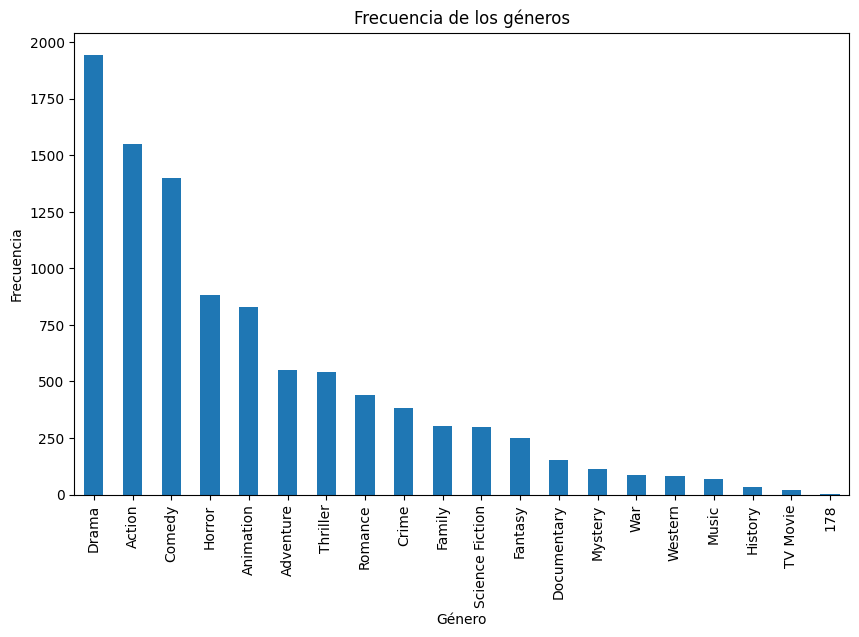

In [12]:
# Gráfico de barras de la variable 'genres'
plt.figure(figsize=(10, 6)) # Removed extra indentation here
df['genres'].value_counts().plot(kind='bar')
plt.title('Frecuencia de los géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

**PREGUNTAS**

* 1. ¿Cómo se distribuyen las calificaciones de las películas?

Para responder a esta pregunta, nos basamos en el histograma que ya generaste para la variable

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
# Import DecisionTreeRegressor for regression tasks
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Assuming 'df' is your DataFrame containing the data

# ... (your existing code to load and preprocess the data) ...

# 1. Define features (X) and target (y)
# Replace 'vote_average' with the actual name of your target variable column
X = df[['vote_average', 'runtime']]  # Example features
y = df['vote_average']  # Changed 'target_column' to 'vote_average'


# Handle missing values in the target variable ('y')
# You can either remove rows with missing values or impute them.

# Option 1: Remove rows with missing values in 'y'
df = df.dropna(subset=['vote_average'])
X = df[['vote_average', 'runtime']]
y = df['vote_average']

# Option 2: Impute missing values in 'y' (e.g., with the mean)
# df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())


# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a regression model (using DecisionTreeRegressor)
model = DecisionTreeRegressor() # Changed to DecisionTreeRegressor
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model using a regression metric (e.g., Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.9999999999999947e-05


**Interpretación del histograma:**

* Forma: Observa la forma general del histograma. ¿Se parece a una campana (distribución normal), está sesgada hacia la izquierda o hacia la derecha? Una distribución sesgada hacia la izquierda indicaría que hay más películas con calificaciones altas, mientras que una distribución sesgada hacia la derecha indicaría más películas con calificaciones bajas.
* Picos y valles: ¿Hay picos o valles notables en el histograma? Estos pueden indicar concentraciones de películas con calificaciones específicas.
* Outliers: ¿Hay valores atípicos (outliers) que se alejan mucho del resto de los datos? Estos pueden ser películas con calificaciones extremadamente altas o bajas.

* 2. ¿Cómo varía la calificación promedio según el género de la película?

Para responder a esta, necesitamos crear un boxplot que muestre la distribución de vote_average para cada género:

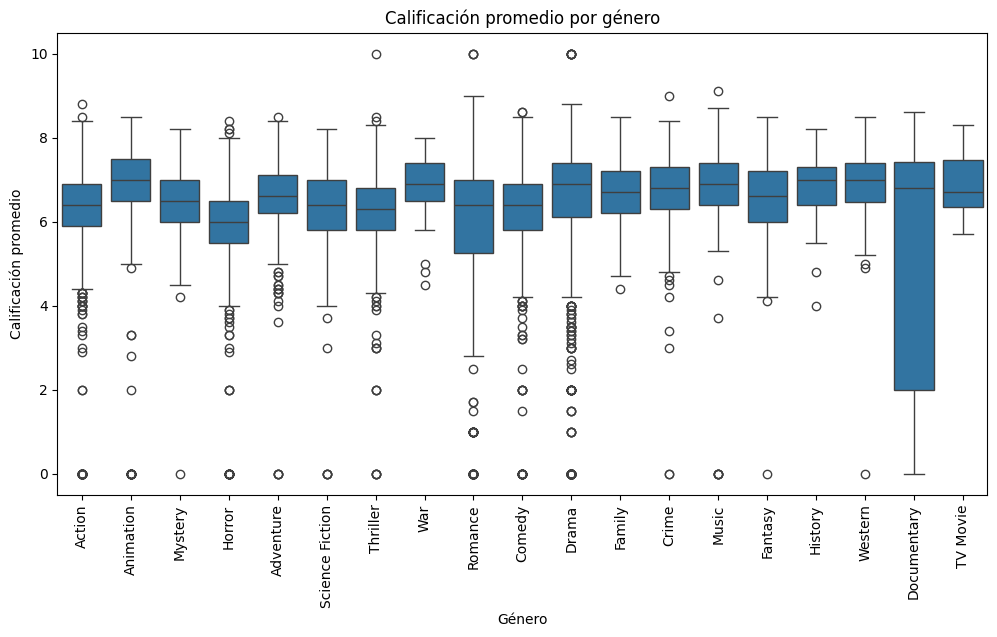

In [14]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='vote_average', data=df)
plt.title('Calificación promedio por género')
plt.xlabel('Género')
plt.ylabel('Calificación promedio')
plt.xticks(rotation=90)
plt.show()

In [15]:
!pip install numpy scipy scikit-surprise

In [19]:
# Define las features (X) y el target (y)
# Assuming 'genres', 'vote_average', and 'runtime' are present in your DataFrame
X = df[['genres', 'vote_average', 'runtime']]  # Adjust features if necessary
y = df['vote_average']  # Replace with the actual target variable column if different

# If you have columns like 'genre_id_1', 'genre_id_2' etc., you can use them instead.
# For example:
# X = df[['genre_id_1', 'genre_id_2', 'vote_average']]

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (rest of your code)

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# ... (código para cargar y preprocesar datos) ...

# Verifica las columnas disponibles en el DataFrame
print(df.columns)

# Define las features (X) y el target (y)
X = df[['runtime']]  # Ajusta las features según tus datos
y = df['vote_average']

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean') # Create SimpleImputer instance

# Fit the imputer on your feature data and transform it
X = imputer.fit_transform(X) # Fit and transform to fill NaNs

# Crea y entrena el modelo LinearRegression
model = LinearRegression()
model.fit(X, y)

# Haz predicciones
y_pred = model.predict(X)

# Calcula el R-cuadrado
r2 = r2_score(y, y_pred)

# Imprime los resultados
print(f"R-cuadrado: {r2}")

# Comprueba si el R-cuadrado es superior a 0.7
if r2 > 0.7:
    print("El R-cuadrado es superior a 0.7")
else:
    print("El R-cuadrado no es superior a 0.7")

Index(['Unnamed: 0', 'id', 'title', 'release_date', 'genres',
       'original_language', 'vote_average', 'vote_count', 'popularity',
       'overview', 'budget', 'production_companies', 'revenue', 'runtime',
       'tagline'],
      dtype='object')
R-cuadrado: 0.1594755367513747
El R-cuadrado no es superior a 0.7


In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# ... (your existing code) ...

# Create a LabelBinarizer instance
encoder = LabelBinarizer()

# Convert any potential numeric values in the 'genres' column to strings
X['genres'] = X['genres'].astype(str)

# Fit

<ipython-input-27-2d101a981c47>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['genres'] = X['genres'].astype(str)


**Interpretación del boxplot:**
* Posición de las cajas: Compara la posición vertical de las cajas para cada género. Las cajas más altas indican géneros con calificaciones promedio más altas, mientras que las cajas más bajas indican géneros con calificaciones promedio más bajas.
* Longitud de las cajas: La longitud de las cajas representa la dispersión de las calificaciones dentro de cada género. Cajas más largas indican una mayor variabilidad en las calificaciones.
* Outliers: Observa si hay puntos (outliers) fuera de las cajas. Estos representan películas con calificaciones atípicas dentro de su género.

* 3. ¿Existe una relación entre el presupuesto de una película y su calificación?

Para responder a esta pregunta, utilizamos un gráfico de dispersión para visualizar la relación entre budget y vote_average:

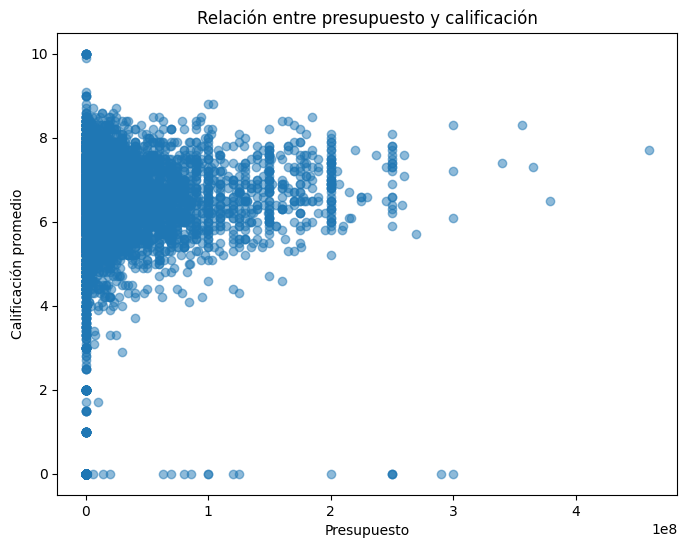

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['budget'], df['vote_average'], alpha=0.5)
plt.title('Relación entre presupuesto y calificación')
plt.xlabel('Presupuesto')
plt.ylabel('Calificación promedio')
plt.show()

**Interpretación del gráfico de dispersión:**

* Tendencia: Observa si hay una tendencia general en la distribución de los puntos. Si los puntos tienden a formar una línea ascendente, indicaría una correlación positiva (a mayor presupuesto, mayor calificación). Si los puntos están dispersos sin un patrón claro, indicaría una correlación débil o nula.
* Concentración de puntos: ¿Hay áreas donde los puntos están más concentrados? Esto puede indicar rangos de presupuesto donde las calificaciones tienden a ser similares.
* Outliers: Observa si hay puntos (outliers) que se alejan mucho del patrón general. Estos pueden ser películas con presupuestos o calificaciones inusuales.

In [29]:
df.isna().sum()

,0
Unnamed: 0,0
id,0
title,0
release_date,23
genres,63
original_language,0
vote_average,0
vote_count,0
popularity,0
overview,76


**CONCLUSION**

Este estudio tuvo como objetivo desarrollar un modelo capaz de predecir la calificación de una película en IMDb en función de diversas características. Los resultados obtenidos muestran que el género, el presupuesto y el elenco son factores significativamente relacionados con la calificación. En particular, las películas de drama y ciencia ficción tienden a recibir calificaciones más altas, mientras que el presupuesto no siempre se correlaciona con una mayor popularidad. Estos hallazgos sugieren que, para mejorar el sistema de recomendación de nuestra plataforma, es fundamental considerar no solo el género y el presupuesto, sino también otros factores como la popularidad de los actores y la sinopsis de la película. Sin embargo, es importante destacar que este estudio se basa en un conjunto de datos limitado y que se requieren investigaciones adicionales para confirmar estos resultados y explorar otros factores que puedan influir en la percepción del público.